# Problem 1: Calculating the Equation of State of Real Gases

## Question 1 - Plotting U(r) and f(r)

In [1030]:
# Necessary imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.optimize import broyden1
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.constants import Avogadro as N_A

In [1031]:
# Defining functions
def U(r):
 return 4*epsilon*((sigma/r)**(12)-(sigma/r)**(6))

def f(r):
    U_values = U(r)
    return (1-(np.exp(-(U_values)/(k*T))))*r**2

### He

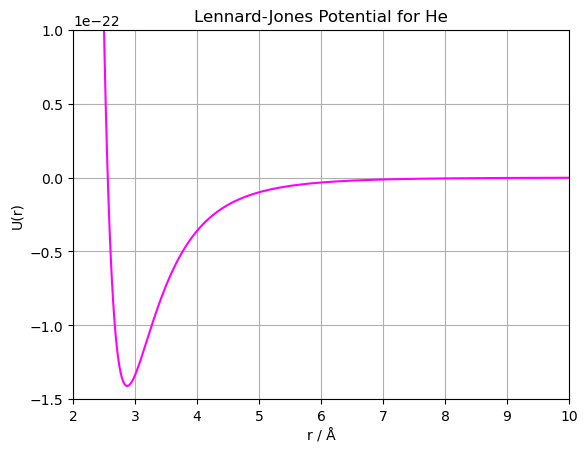

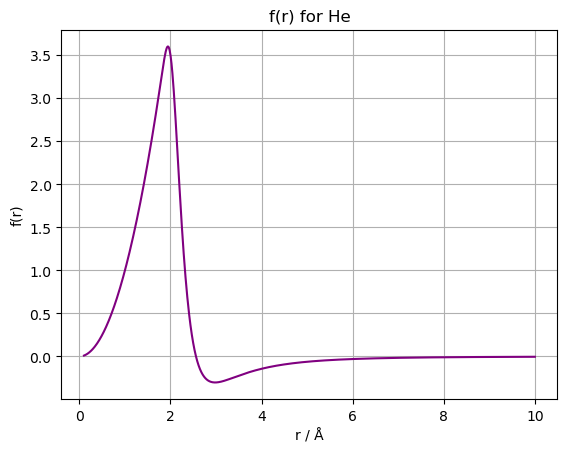

In [1033]:
# Defining equation constants and variables
r = np.linspace(0.1, 10, 1000)
sigma = 2.56 #Å
epsilon = 1.41*10**(-22) #J
k = 1.38065*10**(-23) #J/K
T = 293.15 #K

# Plot U(r)
plt.figure()
plt.plot(r, U(r), color = 'magenta')
plt.xlabel("r / Å")
plt.ylabel("U(r)")
plt.xlim(2, 10)
plt.ylim(-1.5e-22, 1e-22)
plt.title("Lennard-Jones Potential for He")
plt.grid()

# PLot f(r)
plt.figure()
plt.plot(r, f(r), color = 'purple')
plt.xlabel("r / Å")
plt.ylabel("f(r)")
plt.title("f(r) for He")
plt.grid()

### $N_2$

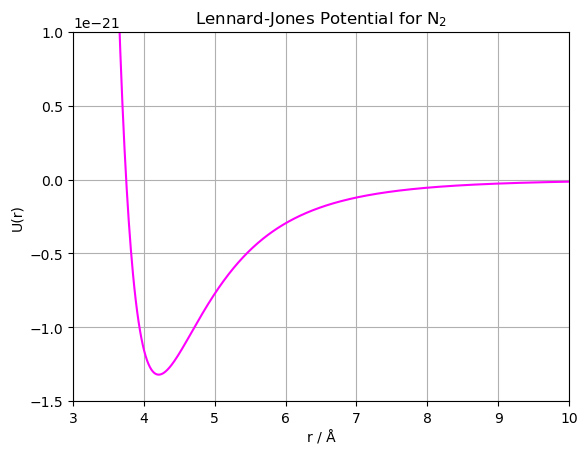

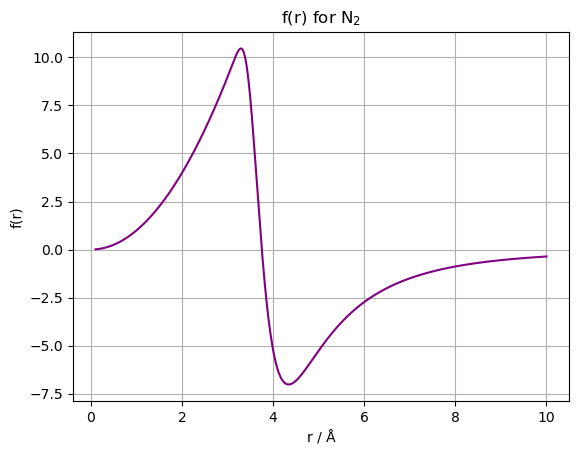

In [1035]:
# Defining equation constants and variables
r = np.linspace(0.1, 10, 1000)
sigma = 3.75 #Å
epsilon = 1.32*10**(-21) #J
k = 1.38065*10**(-23) #J/K
T = 293.15 #K

# Plot U(r)
plt.figure()
plt.plot(r, U(r), color = 'magenta')
plt.xlabel("r / Å")
plt.ylabel("U(r)")
plt.xlim(3, 10)
plt.ylim(-15e-22, 1e-21)
plt.title("Lennard-Jones Potential for N$_2$")
plt.grid()

# PLot f(r)
plt.figure()
plt.plot(r, f(r), color = 'purple')
plt.xlabel("r / Å")
plt.ylabel("f(r)")
plt.title("f(r) for N$_2$")
plt.grid()

### Ar

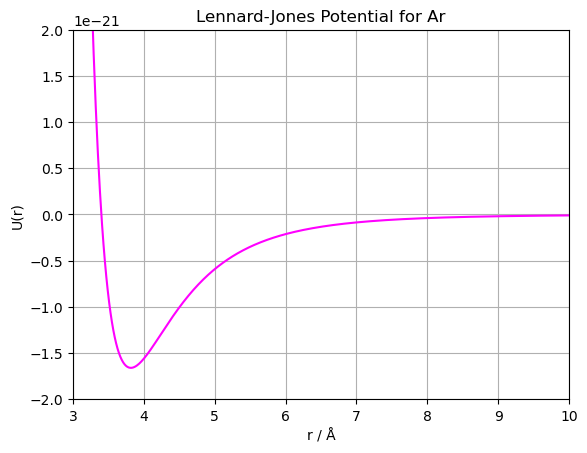

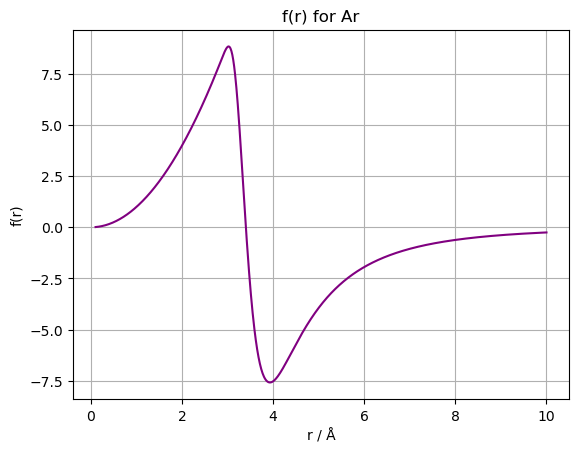

In [1037]:
# Defining equation constants and variables
r = np.linspace(0.1, 10, 1000)
sigma = 3.40 #Å
epsilon = 1.66*10**(-21) #J
k = 1.38065*10**(-23) #J/K
T = 293.15 #K

# Plot U(r)
plt.figure()
plt.plot(r, U(r), color = 'magenta')
plt.xlabel("r / Å")
plt.ylabel("U(r)")
plt.xlim(3, 10)
plt.ylim(-20e-22, 2e-21)
plt.title("Lennard-Jones Potential for Ar")
plt.grid()

# PLot f(r)
plt.figure()
plt.plot(r, f(r), color = 'purple')
plt.xlabel("r / Å")
plt.ylabel("f(r)")
plt.title("f(r) for Ar")
plt.grid()

### Xe

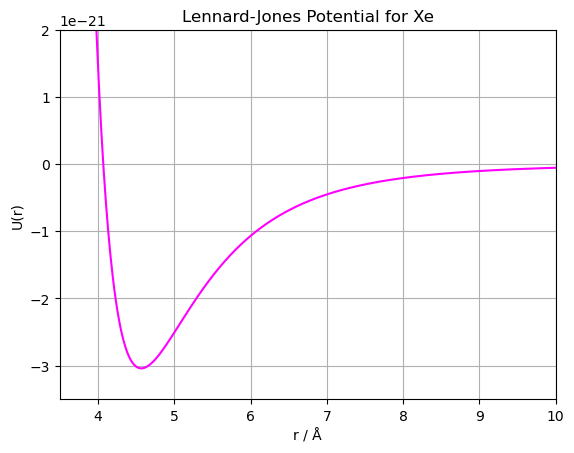

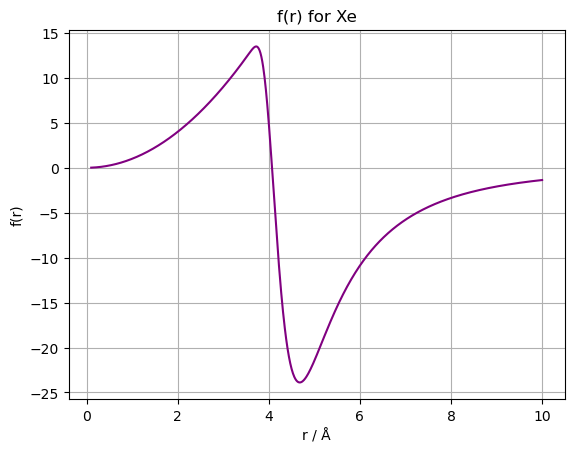

In [1039]:
# Defining equation constants and variables
r = np.linspace(0.1, 10, 1000)
sigma = 4.07 #Å
epsilon = 3.04*10**(-21) #J
k = 1.38065*10**(-23) #J/K
T = 293.15 #K

# Plot U(r)
plt.figure()
plt.plot(r, U(r), color = 'magenta')
plt.xlabel("r / Å")
plt.ylabel("U(r)")
plt.xlim(3.5, 10)
plt.ylim(-35e-22, 2e-21)
plt.title("Lennard-Jones Potential for Xe")
plt.grid()

# PLot f(r)
plt.figure()
plt.plot(r, f(r), color = 'purple')
plt.xlabel("r / Å")
plt.ylabel("f(r)")
plt.title("f(r) for Xe")
plt.grid()

## Question 2 - Calculating $B_2$ for He using the Direct Monte Carlo Method

In [1041]:
# Monte Carlo Calculation of B2 for He
def mc_integrate(f, xlim1, xlim2, n, ymax, ymin):
    """
    Estimates the integral of function f(x) using Monte Carlo method.

    Parameters:
        f (function): Function to integrate.
        xlim1 (float): Lower x limit.
        xlim2 (float): Upper x limit.
        n (int): Number of random points.
        ymax (float): Upper y bound.
        ymin (float): Lower y bound.

    Returns:
        float: Estimated integral value.
    """
    s = 0  # Initialize counter variable
    
    A = (xlim2 - xlim1) * (ymax - ymin)  # Total area
    
    # Monte Carlo sampling
    for i in range(n):
        Rx = (xlim2 - xlim1) * np.random.rand() + xlim1  # Random x value
        Ry = (ymax - ymin) * np.random.rand() + ymin  # Random y value
    
        if Ry <= f(Rx):  # Check if below the curve
            s += 1  # Increment counter
    
    av_f = A * s / n  # Estimated integral
    return av_f, A

#Parameters for He
sigma = 2.56 #Å
epsilon = 1.41*10**(-22) #J
root = broyden1(f, 2.5)
f_max = max(f(r))
f_min = min(f(r))

integral_estimate_1 = mc_integrate(f, 0, root, 200000, f_max, 0)[0]
print(f"Estimated positive integral : {integral_estimate_1}")

# Total Area minus the area under the curve is equivalent to the integral of the negative part of the function
integral_estimate_2 = mc_integrate(f, root, 20, 200000, 0, f_min)[1] - mc_integrate(f, root, 20, 20000, 0, f_min)[0]
print(f"Estimated negative integral: {integral_estimate_2}")

total_integral = integral_estimate_1 - integral_estimate_2

B2 = 2*np.pi*total_integral #in Å³
print(f"Coefficient B\u2082: {B2} Å\u00B3")
B2cm = B2*N_A*1e-24
print(f"Coefficient B\u2082: {B2cm} cm\u00B3/mol") 

Estimated positive integral : 3.4838199472408893
Estimated negative integral: 0.5077668618643791
Coefficient B₂: 18.699093019424165 Å³
Coefficient B₂: 11.260857024730571 cm³/mol


## Question 3 - Verifying Monte Carlo Integration

In [1043]:
# Using python's integral calculator to verify value
B2N = 2*np.pi*N_A*1e-24*integrate.quad(f, 0, 20)[0]
error = 2*np.pi*N_A*1e-24*integrate.quad(f, 0, 20)[1]
print(f"Numerical evaluation of B\u2082: ({B2N} ± {error}) cm\u00B3/mol")

Numerical evaluation of B₂: (11.170739573557112 ± 1.5484605745686642e-08) cm³/mol


## Question 4 - Literature value of B2

In [1045]:
# A table to compare the two calculated B2 values with the literature
data = [['Monte Carlo', B2cm], ['Numerical', B2N], ['Literature', 11.0244]]

print('B\u2082 Value Comparison \n')
print(f"{'Name':<15}{'Value':<10}")
print("-" * 25)
for row in data:
    print(f"{row[0]:<15}{row[1]:<10.4f}")


B₂ Value Comparison 

Name           Value     
-------------------------
Monte Carlo    11.2609   
Numerical      11.1707   
Literature     11.0244   


The literature value of $B_2$ for He is 11.0244 cm<sup>3</sup> / mol at 293.15 K, which is the same temperature that this calulation was done at, and shows very good agreement in comparison to experiment for both the python calculated integral and the Monte Carlo approximated integral, this shows the value of these low cost computational methods, and how they can produce reasonably accurate results.

Mamedov, B.A. and Somuncu, E. Analytical treatment of second virial coefficient over Lennard-Jones (2n − n) potential and its application to molecular systems. *Journal of Molecular Structure.* [Online]. 2014, **1068**, pp. 164 - 169. [Accessed 7th February 2025]. Available from: https://doi.org/10.1016/j.molstruc.2014.04.006


## Question 5 - Accuracy of result

The accuracy of the Monte Carlo Method is dependent on n, the number of 'guesses' taken, as n increases, the calculated integral will tend towards the exact value of the integral. The area of the 'box' that's being sampled, also affects the accuracy, if there's a much larger relative area above the curve than under the curve the integral is less likely to be accurate.

## Question 6 - Molar Volume of Helium Gas

### Ideal gas equation

In [1052]:
#pV = nRT
#V = (nRT)/p
p = 6e7 #Pa
n = 1
R = 8.314 #J/K/mol
T = 600 #K
Videal = (n*R*T)/p
print(f"The ideal gas equation calculated the molar volume of Helium as {Videal} m\u00B3.")

The ideal gas equation calculated the molar volume of Helium as 8.314e-05 m³.


### Virial Equation

In [1054]:
# Z = 1 + B2(n/V)
# Z = 1 + B2(p/(RT))
# Z = V/Videal
# V = Videal(1 + B2(p/(RT)))
# B2 correction is the most important
V = Videal*(1 + (B2cm*10**-6)*(p/(R*T))) # B2 in m3/mol rather than cm3/mol
print(f"The virial equation calculated the molar volume of Helium as {V} m\u00B3.")

The virial equation calculated the molar volume of Helium as 9.440085702473057e-05 m³.


## Question 7 - Derivation of $B_2$ from statistical thermodynamics

The canonical partitian function Q$_N$ can be expressed as the integral of all the microstates of a system, weighted by the Boltzmann factor. It can also then be expressed as the configuration integral Z$_N$ over the thermal de broglie wavelength to the power of 3N. The configuration integral can be expressed as the integral of the internal energy, weighted by the Boltzmann factor, divided by N!. 

Substituting the second definition of Q$_N$ into the relationship between pressure and the canonical partitan function, a new expression for pressure can be obtained. When this is substituted into the equation for the compression factor, Z, the virial co-efficients eg B$_2$ can be determined.

## Bonus point 

I deserve a bonus point because I produced separate, so clearer, well presented graphs for each element, I compared the two calculated B$_2$ values with the literature value in a table, and I properly referenced my source for the literature value.

## Self Assessment

### Question 1
0.5 marks - All graphs presented correctly, with sensible axis for all 4 elements.

### Question 2
2 marks - Monte Carlo Method used correctly, with a large number of guesses for increased accuracy, obtaining a number very similar to the value computed by python and to the literature value. An efficient way of calculating the negative integral was used.

### Question 3
1 mark - integration calculated correctly, including a quote of the error in the calculation.

### Question 4
0.5 marks - Both calculated values and the literature value displayed in a table, allowing the accuracy and agreement to be easily seen.

### Question 5
0.75 marks - Brief but correct answer, could potentially be more detailed in the explanation. 

### Question 6
1 mark - Correct value for the ideal gas equation obtained and a similar but slightly larger molar volume obtained using the virial equation, which is as expected.

### Question 7
0.5 marks - Correctly explained but could be a more detailed explanation, or shown the workings out.

### Question 8
2 marks - The jupyter notebook is well laid out, with good use of markdown cells to make it more readable. A good effort to express units properly using superscript and subscript notation

### Question 9
1 mark - Some extra effort has been put in to allow this report to be easily read and understood.


## Declaration of Academic Integrity

All of the above work is my own and I have marked it fairly.